## Load SEC Pasre Results for further Analysis and Modelling

In [2]:
import os
import re
import time
import pandas as pd


df_bankruptcy_parsed = pd.read_csv('data/results_location/bankruptcy_results.csv', delimiter='|')
df_bankruptcy_parsed['Parse_Bnkrpt'].value_counts()

0    1858
1     184
Name: Parse_Bnkrpt, dtype: int64

In [5]:
data = pd.read_csv('C:/Users/dirving/Downloads/parse_results_Fri__09_Jun_2017_20_18_50__0000.csv', sep='|')
data.T

,0,1,2,3,4,5,6,7,8,9,10,11
CIK,1040829,1289046,1399520,1408100,1567514,26172,26172,26172,58492,78311,799694,914208
CIK_filing,1193125,1469709,1144204,1408100,1193125,26172,26172,26172,26172,1471242,1471242,914208
year,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013
uid,167518,5,55468,59,358382,4,6,13,2,265,277,522
Parsed_Company_Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abs_filename,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...,data/test_filename_parse/new_david_parse/edgar...
time_to_complete,43.4133,13.8702,16.3534,10.0071,10.6006,0.823895,0.537169,0.756541,0.783814,0.509508,5.28739,21.6387
processed_abs_filename,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...,data/test_filename_parse/new_david_parse/trans...
pre_processed_file_size(Bytes),739759,362672,410369,391601,377470,882570,612932,855320,877286,386390,1517102,553755
post_processed_file_size(Bytes),367122,172757,193455,131583,185530,13359,8646,12024,12791,15615,108586,212861


In [2]:
# # #programmatically verify bankruptcy
# # df = df_bankruptcy_parsed[df_bankruptcy_parsed['Parse_Bnkrpt']==1]

# # for i in list(df.index):
# #     print(df.ix[i, 'excerpt_decision'])
# #     keep_flag = input('valid classification y/n: ')
# #     clear_output()


# #recover excerpt list from one document
# from IPython.display import clear_output

# import ast
# bnkrpt_sentences = ast.literal_eval(df_bankruptcy_parsed.ix[6, 'excerpt_decision'])

# # for i in bnkrpt_sentences:
# #     print(i)
# #     A = input('valid classification y/n: ')
# #     clear_output()

## Check similarity among excerpts, then similarirty among entire documents using Parse results
#### https://stats.stackexchange.com/questions/153069/bag-of-words-for-text-classification-why-not-just-use-word-frequencies-instead
#### http://stackoverflow.com/questions/8897593/similarity-between-two-text-documents

In [3]:
List_SEC_files = []
df = df_bankruptcy_parsed[df_bankruptcy_parsed['Parse_Bnkrpt']==1].reset_index()
for i in range(df.shape[0]): 
    List_SEC_files = List_SEC_files + [df.ix[i, 'abs_filename']]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
#similarity between text in one document

#documents = [open(f) for f in List_SEC_files]
documents = bnkrpt_sentences

tfidf = TfidfVectorizer().fit_transform(documents)

##no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf*tfidf.T
pairwise_similarity.todense()

matrix([[ 1.        ,  1.        ,  0.14677165, ...,  0.12023496,
          0.19831277,  0.20463924],
        [ 1.        ,  1.        ,  0.14677165, ...,  0.12023496,
          0.19831277,  0.20463924],
        [ 0.14677165,  0.14677165,  1.        , ...,  0.05884871,
          0.16881633,  0.10039955],
        ..., 
        [ 0.12023496,  0.12023496,  0.05884871, ...,  1.        ,
          0.22296474,  0.11459829],
        [ 0.19831277,  0.19831277,  0.16881633, ...,  0.22296474,
          1.        ,  0.39203788],
        [ 0.20463924,  0.20463924,  0.10039955, ...,  0.11459829,
          0.39203788,  1.        ]])

In [61]:
# #similarity between text across all documents

# documents = [open(f, encoding='utf8').read() for f in List_SEC_files]

# tfidf = TfidfVectorizer(ngram_range=(1, 3)).fit_transform(documents)

# ##no need to normalize, since Vectorizer will return normalized tf-idf
# pairwise_similarity = tfidf*tfidf.T
# sim_mat_documents = pairwise_similarity.todense() #similarity matrix between documents

### Keep compound words only.

In [56]:
# Sentence Tokenizer & Clean up non-Ascii charcaters
import re
import pandas as pd
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize, pos_tag

# from nltk import data
# #sentence tokenizer is loaded on demand, o best to load one time
# tokenizer = data.load('tokenizers/punkt/PY3/english.pickle')


def strip_non_ascii(string):
    ''' Strips out non-ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)


#Below is not particularly robust, furthermore using tf-idf (along with the format of the SEC form  would make the 
#header features neglibile in the fits would make the 
def Remove_Header(text_raw):
    start = 'FORMER COMPANY:'.lower()
    s = text_raw.lower()
    return s[ (s.find(start)+len(start)):-1 ]
#USAGE:
#text_raw = Remove_Header(text_raw)


def text_preprocess(text_raw):
    
    # Break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text_raw.splitlines())
    
    # Generator, will have to re-run each instance
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    
    # Drop blank lines, by separting chunks of text by a carraige return
    text = ' '.join(chunk for chunk in chunks if chunk)
    text = strip_non_ascii(text)
            
    #Convert all multiple spaces to single spaces:
    #text = re.sub("\s\s+", " ", text)
    
    #-----------------------------------------------------------------------
    # Tokenize sentences
    ## OVERKILL 1? 
    # the sentence tokenizer performs poorly for SEC documents, also the 
    text = sent_tokenize(text)
    
    #lower case
    text = [ ' '.join([word.lower() for word in word_tokenize(sentence)]) for sentence in text ]
    
    
    #text_sent=text
    #print(bool('.' in text))
    #text = tokenizer.tokenize(text)
    
    #DON'T JOIN!!!
    #text = ' '.join(i.lower() for i in text)
    #-------------------------------------------------------------------------
    
    
    # Drop out non-word tokens
    #==========================
    ListOfWords = word_tokenize(' '.join(i for i in text))  ##OVERKILL 2? #word tokenizer lists all words--none ar remmoved
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    # this essentially removes all punctuation
    for word in ListOfWords:
#        if re.search('[^a-zA-Z.]', word):
        if re.search('[^a-zA-Z.-]', word): #allows acronyms like i.r.s.
            filtered_tokens.append(word)    
    #==========================    
    
    List_Days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    List_Days = [i.lower() for i in List_Days]
    List_Months = ['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
                   'November', 'December']
    List_Months = [i.lower() for i in List_Months]

    text = [ ' '.join([word for word in word_tokenize(sentence) if word not in filtered_tokens]) for sentence in text ]
    text = [ ' '.join([word for word in word_tokenize(sentence) if len(word)>3]) for sentence in text ]
    text = [ ' '.join([word for word in word_tokenize(sentence) if word not in stopwords.words('english')]) for sentence in text ]
    text = [ ' '.join([word for word in word_tokenize(sentence) if wordnet.synsets(word)]) for sentence in text ]
    text = [ ' '.join([word for word in word_tokenize(sentence) if word not in List_Days]) for sentence in text ]
    text = [ ' '.join([word for word in word_tokenize(sentence) if word not in List_Months]) for sentence in text ]
    text = [ ' '.join([word.replace('.', '') for word in word_tokenize(sentence)]) for sentence in text ]
    text = [ re.sub("\s\s+", " ", sentence) for sentence in text]
    
    return text

#    return ' '.join(i for i in texta)
#    return texta



#-------------------------------------------
#     #Search for bi-grams:
#     #List_bi_Grams =  
#     from nltk.collocations import BigramCollocationFinder
#     from nltk.metrics import BigramAssocMeasures
    
#     words = [w.lower() for w in webtext.words('grail.txt')]
#     bcf = BigramCollocationFinder.from_words(words)
#     bcf.nbest(BigramAssocMeasures.likelihood_ratio, 4)
    
    #complete lemitization
    

#USAGE
#processed_text = text_preprocess(text_raw)

In [57]:
text_raw = open(List_SEC_files[0], encoding='utf8').read()
#text_raw = Remove_Header(text_raw)
hh = text_preprocess(text_raw)
hh

['accession number conformed submission type public document count conformed period report item information entry material definitive agreement item information creation direct financial obligation obligation balance sheet arrangement registrant item information financial statements exhibits filed date date change filer company data company conformed name energy central index standard industrial classification crude petroleum natural number state incorporation fiscal year filing values form type file number film number business address street seventeenth street street suite city denver state business phone mail address street seventeenth street street suite city denver state former company former conformed name basic earth science systems date name change current report united states securities exchange commission washington dc form current report pursuant section securities exchange date earliest event reported commission file number',
 'exact name registrant specified charter delawar

In [59]:
#each sentence goes on its own line
with open('data/results_location/extracted_text.txt', 'a+') as file_Obj:
    for item in hh:
        file_Obj.write("%s\n" % item)
    file_Obj.close()

In [63]:
tfidf = TfidfVectorizer(ngram_range=(1, 2)).fit_transform(hh)

##no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf*tfidf.T
sim_mat_documents = pairwise_similarity.todense() #similarity matrix between documents

#3-gram: 10 rows × 23592 columns
#2-grams 10 rows × 11485 columns

In [66]:
sim_mat_documents = pd.DataFrame( tfidf.todense() ).head(10)
sim_mat_documents

,0,1,2,3,4,5,6,7,8,9,...,11475,11476,11477,11478,11479,11480,11481,11482,11483,11484
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#documents = [text_preprocess(open(f, encoding='utf8').read()) for f in List_SEC_files]
#write these as text files

In [ ]:
#df_business_issue = pd.read_csv(location_business_issue_file_absolute, delimiter='|')

### Run K-means to see if similarities are clustered. It they are, this suggests there the initial parse method may be a good start for a more robust apporach

In [ ]:
# similarity score across all (not just banlkrupt) may be useles since we different companies talking about different thinsg.

In [10]:
# http://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method

from sklearn.cluster import KMeans

Ks = range(1, 10)
km = [KMeans(n_clusters=i, n_jobs=-1) for i in Ks] #Object instantiation list
score = [km[i].fit(sim_mat_documents).score(sim_mat_documents) for i in range(len(km))]

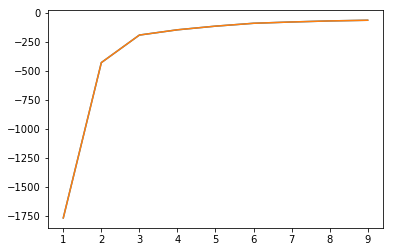

In [12]:
import matplotlib.pyplot as plt
plt.plot(Ks, score)
plt.show()

In [14]:
opt_clusters = 2
cluster_array = [ km[opt_clusters].fit(sim_mat_documents) ]

In [15]:
cluster_array

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
     random_state=None, tol=0.0001, verbose=0)]

### http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

### ngram_range : tuple (min_n, max_n)
### The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [ ]:
# 
# 184 rows × 5022899 columns (no n-grams) #raw text not cleaned

# References (super useful)

#### http://stevenloria.com/finding-important-words-in-a-document-using-tf-idf/ (basic breakdown)
#### http://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
#### http://stackoverflow.com/questions/25346058/removing-list-of-words-from-a-string
#### http://stackoverflow.com/questions/11967516/python-concatenate-list
#### 

# logistic regression feature search, then t-SNE

http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

https://stats.stackexchange.com/questions/106344/how-to-quantify-the-relative-variable-importance-in-logistic-regression-in-terms

https://stats.stackexchange.com/questions/12854/maximum-number-of-independent-variables-that-can-be-entered-into-a-multiple-regr

https://blog.sourced.tech/post/lapjv/?utm_source=Mailing+list&utm_campaign=8ed002c926-Kaggle_Newsletter_04-11-2017&utm_medium=email&utm_term=0_f42f9df1e1-8ed002c926-401044313